In [87]:
import os
import pandas as pd
import seaborn as sns
os.chdir(r'C:\Users\acer\Desktop\HAMOYE')
df = pd.read_csv('energydata_complete.csv')
df = df.drop(columns = ['date'])

In [88]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<AxesSubplot:xlabel='T2', ylabel='T6'>

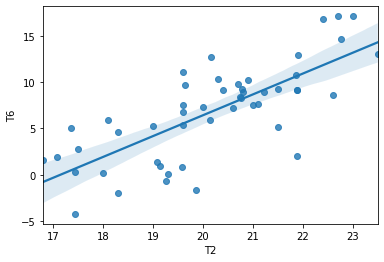

In [82]:
#select a sample of the dataset
simple_linear_reg_df = df[['T2', 'T6']].sample(50, random_state=2)
simple_linear_reg_df
#regression plot
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

## from sklearn.metrics import r2_score
r2_score = r2_score(y='T6', x='T2')
round(r2_score, 3 ) #prints 0.893

In [84]:
#r2 score
from sklearn.metrics import r2_score
x1= df['T2']
y1 =df['T6']
r2_score = r2_score(x1, y1)
round(r2_score, 3 ) #prints 0.893

-35.393

Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size= 0.3 , random_state= 1 )
linear_model = LinearRegression() 
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

In [89]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns=['lights'])
heating_target = normalised_df['Appliances']

#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size= 0.3 , random_state= 42 )
linear_model = LinearRegression() 
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [90]:
print(y_test)

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64


In [91]:
#obtain predictions
predicted_values = linear_model.predict(x_test)


In [92]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) #prints 0.063

0.0

In [93]:
#Residual Sum of Squares
import numpy as np
rss = np.sum(np.square(y_test -predicted_values))
round(rss, 3) #prints 1.823



0.0

In [94]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 ) #prints 0.089

0.0

In [95]:
#r2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3 ) #prints 0.893

1.0

In [96]:
import numpy as np
corr_matrix = np.corrcoef(y_test, predicted_values)
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(x_train, y_train)

#feature selection
from sklearn.linear_model import Lasso
import sklearn.model_selection as snms
lasso_reg = Lasso(alpha= 0.0001 )
lasso_reg.fit(x_train, y_train)
corr_matrix

array([[1., 1.],
       [1., 1.]])

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,test_size= 0.3 , random_state= 1 )
linear_model = LinearRegression() 
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
#this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = [ 'Features' , col_name]
  weights_df[col_name].round( 3 )
  return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'linear_Model_Weight' )


In [98]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')


In [99]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [76]:
final_weights


,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_1,-1.511851e-15,0.001887,0.000000
1,T1,-1.231173e-15,-0.000067,0.000000
2,RH_9,-9.583734e-16,-0.000150,-0.000000
3,RH_out,-9.206549e-16,-0.000199,-0.000000
4,RH_4,-7.557680e-16,0.000089,0.000000
5,RH_5,-6.428718e-16,0.000059,0.000000
6,RH_8,-4.532885e-16,-0.000570,-0.000000
7,T4,-4.480325e-16,0.000099,0.000000
8,T5,-3.634460e-16,-0.000072,0.000000
9,RH_3,-4.486307e-17,0.000346,0.000000
